# Prueba de conocimientos

## Paquetes

In [16]:
import pandas as pd
import geoplot.crs as gcrs
import geoplot as gplt
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

## Cargue de datos

In [3]:
df = pd.read_csv(r'..\input\house_data.csv')
df.shape

(21613, 21)

In [77]:
seattle = gpd.read_file("..\input\maps\kc_block_10.shp")
seattle.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,UR10,UACE10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,TRACT_10,Shape_Leng,Shape_Area,TRBL,geometry
0,1,53,033,006700,1001,530330067001001,Block 1001,G5040,None,None,S,121128.0,0.0,+47.6319178,-122.3399002,6700,0.027448,1.449595e-05,6700.1001,"POLYGON ((-122.34063 47.63249, -122.34034 47.6..."
1,2,53,033,006900,1009,530330069001009,Block 1009,G5040,None,None,S,20412.0,0.0,+47.6368455,-122.3629779,6900,0.006327,2.443019e-06,6900.1009,"POLYGON ((-122.36232 47.63593, -122.36366 47.6..."
2,3,53,033,011600,3013,530330116003013,Block 3013,G5040,None,None,S,23687.0,0.0,+47.5235687,-122.3857630,11600,0.008314,2.828987e-06,11600.3013,"POLYGON ((-122.38455 47.52419, -122.38456 47.5..."
3,4,53,033,011600,5021,530330116005021,Block 5021,G5040,None,None,S,16082.0,0.0,+47.5204486,-122.3920438,11600,0.005893,1.920568e-06,11600.5021,"POLYGON ((-122.39178 47.51974, -122.39256 47.5..."
4,5,53,033,011600,5023,530330116005023,Block 5023,G5040,None,None,S,2697.0,0.0,+47.5205365,-122.3899013,11600,0.003135,3.220622e-07,11600.5023,"POLYGON ((-122.39022 47.52080, -122.38939 47.5..."


In [71]:
continental_usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
continental_usa_cities = continental_usa_cities.query('STATE in ["WA"]')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('usa_cities'))


<GeoAxesSubplot:>

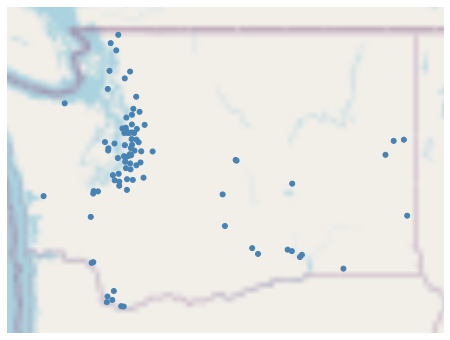

In [72]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax)

In [68]:
contiguous_usa.head()
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


In [59]:
viviendas = df[['id','lat','long']]
# viviendas.assign(geometry = lambda dataframe: dataframe['age'].map(lambda age: True if age >= 65 else False) )
viviendas = viviendas.assign(STATE = 'WA')
viviendas['long'] = viviendas['long'].astype(str)
viviendas['lat'] = viviendas['lat'].astype(str)
viviendas = viviendas.assign(geometry = 'POINT(' + viviendas['long'] + ' ' + viviendas['lat'] + ')')
gplt.pointplot(viviendas, ax=ax)

AttributeError: 'DataFrame' object has no attribute 'total_bounds'

In [63]:
type(continental_usa_cities)
type(viviendas)

pandas.core.frame.DataFrame

In [65]:
viviendas = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))

C:\Users\Cris\anaconda3\envs\PruebaInmobiliaria\lib\site-packages\geoplot\geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


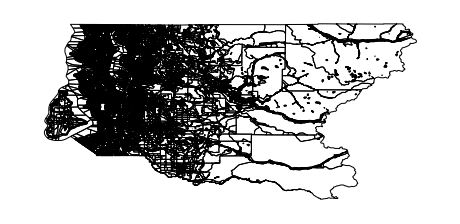

In [78]:
ax = gplt.polyplot(seattle)
gplt.pointplot(viviendas, ax=ax)